In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import utils.plotter as pltutils
import utils.params as pars
from importlib import reload
reload(pars)
reload(pltutils);

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] =  "Times New Roman"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # comment out this part if seaborn is not installed
# import seaborn as sns
# sns.set_style("ticks")
# sns.set_context("paper")
# sns.color_palette("colorblind");

# Parameter Choice

In [45]:
network_type = 'multi-user' # 'single-user' # 'multi-user'
arrival_rate_scaling_list = [1/3, 2/3, 1] if network_type == 'multi-user' else [1/3, 1.575/3, 2/3] 
noise_variances_list = [0, 0.01, 0.05, 0.1]
print(arrival_rate_scaling_list)

save_as = '.pdf'
save_figs_to_folder = None # will not save if set to None
# save_figs_to_folder = './results/figs/'

[0.3333333333333333, 0.6666666666666666, 1]


# Regret Plots

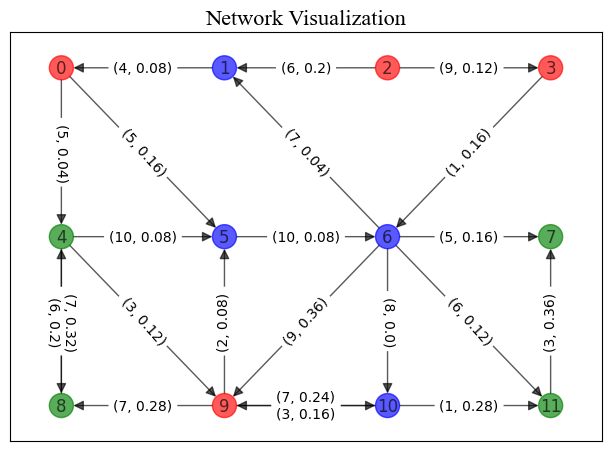

In [46]:
simulation_params = pars.get_simulation_params(network_type, is_regret_sim=True)
arrival_rate_scaling = simulation_params.arrival_rate_scaling
noise_variance = simulation_params.noise_variance

In [47]:
sweep_results_folder = './results/regret-sweep/' + network_type
show_theoretical = [0, 0, 0, 1]
plot_style = ['-x', '-o', '-s', '-^']

LABELS_SIZE = 16
LEGEND_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=LABELS_SIZE)
plt.rc('ytick', labelsize=LABELS_SIZE)
plt.rc('legend', fontsize=LEGEND_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

### Combined Regret Plots

In [48]:
with open(sweep_results_folder + '/regret-lambda-' + ('%.3f'%(arrival_rate_scaling_list[-1])).replace('.','_') + '-var-0.pkl', 'rb') as f: 
    backlog_cost_C_B =  pkl.load(f)['C_L']

Fit co-effs [1 sqrt(T)log(T)] = [15672.924     4.306]
Fit co-effs [1 sqrt(T)log(T)] = [14822.011     5.046]
Fit co-effs [1 sqrt(T)log(T)] = [11254.422     7.036]


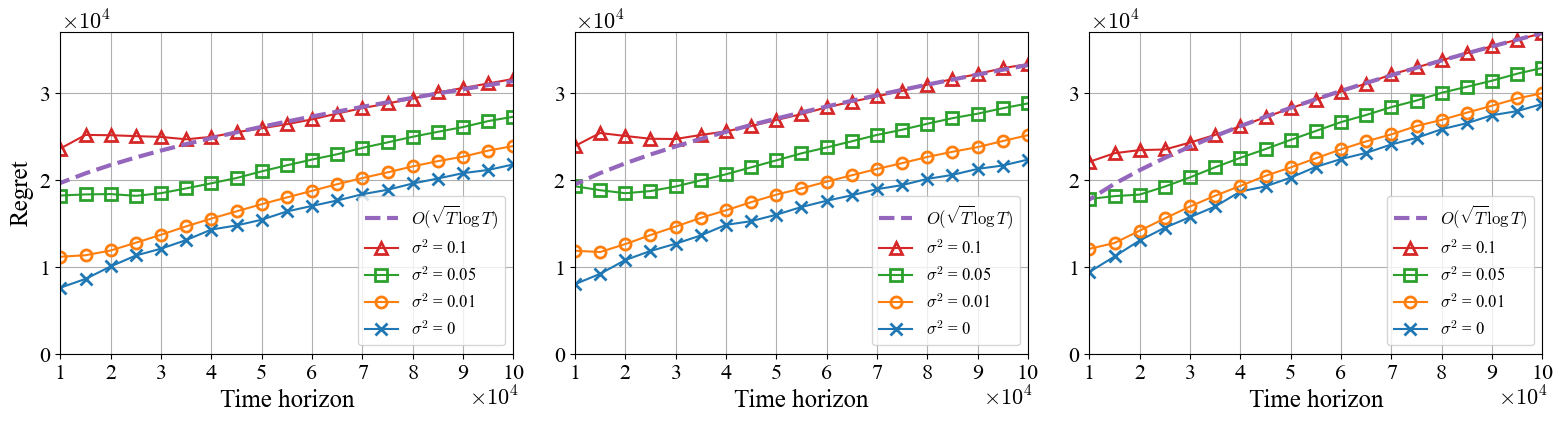

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=len(arrival_rate_scaling_list), figsize=(16, 4.6))
for ii, arrival_rate_scaling in enumerate(arrival_rate_scaling_list):
    pltutils.plot_regret_curve(axs[ii], network_type, backlog_cost_C_B, arrival_rate_scaling, noise_variances_list, show_theoretical, sweep_results_folder, plot_style, ii == 0, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type + '/regret-plots' + save_as, bbox_inches='tight')
plt.show()

### Separate Regret Plots

Fit co-effs [1 sqrt(T)log(T)] = [15672.924     4.306]


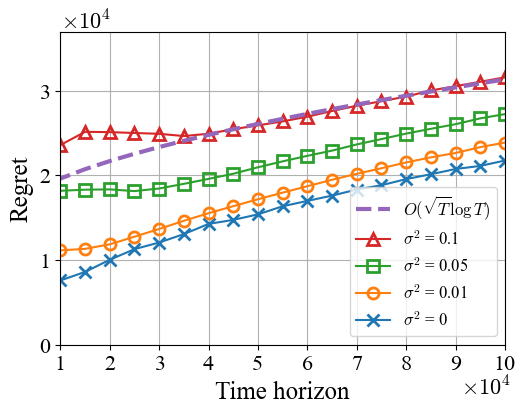

Fit co-effs [1 sqrt(T)log(T)] = [14822.011     5.046]


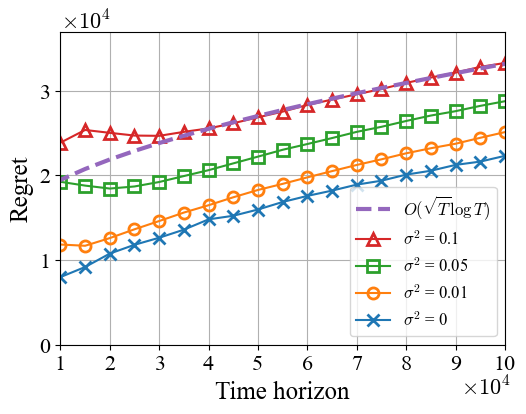

Fit co-effs [1 sqrt(T)log(T)] = [11254.422     7.036]


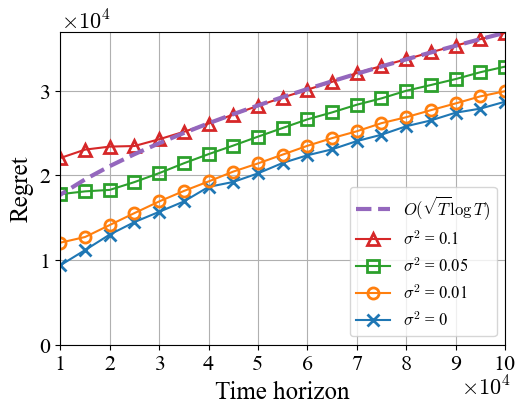

In [50]:
for ii, arrival_rate_scaling in enumerate(arrival_rate_scaling_list):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.6, 4.5))
    pltutils.plot_regret_curve(ax, network_type, backlog_cost_C_B, arrival_rate_scaling, noise_variances_list, show_theoretical, sweep_results_folder, plot_style, True, LABELS_SIZE)
    plt.tight_layout()
    if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type + '/regret-plots-lambda-' + ('%.3f'%(arrival_rate_scaling)).replace('.','_') + save_as, bbox_inches='tight')
    plt.show();

# Cost, Backlog, and Usage Plots

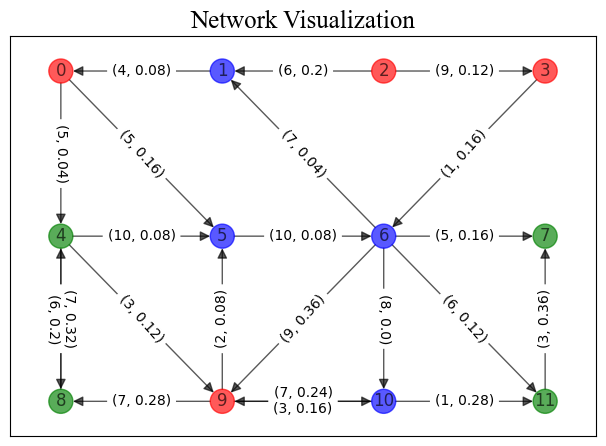

In [51]:
simulation_params = pars.get_simulation_params(network_type, is_regret_sim=False)
arrival_rate_scaling = simulation_params.arrival_rate_scaling
noise_variance = simulation_params.noise_variance

In [52]:
LABELS_SIZE = 14
LEGEND_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=LABELS_SIZE)
plt.rc('ytick', labelsize=LABELS_SIZE)
plt.rc('legend', fontsize=LEGEND_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [53]:
run_results_folder = './results/' + network_type + '/'

stat_cost_till_tt, \
    unknownT_tran_cost_at_tt, unknownT_backlog_at_tt, \
    unknownT_tran_cost_till_tt, unknownT_backlog_cost_at_tt,\
    knownT_tran_cost_at_tt, knownT_backlog_at_tt, \
    knownT_tran_cost_till_tt, knownT_backlog_cost_at_tt, \
    oracle_tran_cost_at_tt, oracle_backlog_at_tt, \
    oracle_tran_cost_till_tt, oracle_backlog_cost_at_tt = np.load(run_results_folder + 'run-lambda-' + ('%.3f'%(arrival_rate_scaling)).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')

all_rates = np.load(run_results_folder + 'edge-rates-lambda-' + ('%.3f'%(arrival_rate_scaling)).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')
N_runs = int(all_rates.shape[0]//2)
T_horizon = simulation_params.T_horizon
edge_capacities = simulation_params.edge_capacities
dpop_rates, oracle_rates = all_rates[:N_runs,:], all_rates[N_runs:,:]

until_T_list = [int(T_horizon/10), T_horizon]
until_T_labels = ['T/10', 'T']

### Combined Backlog, Cost, and Usage Plots

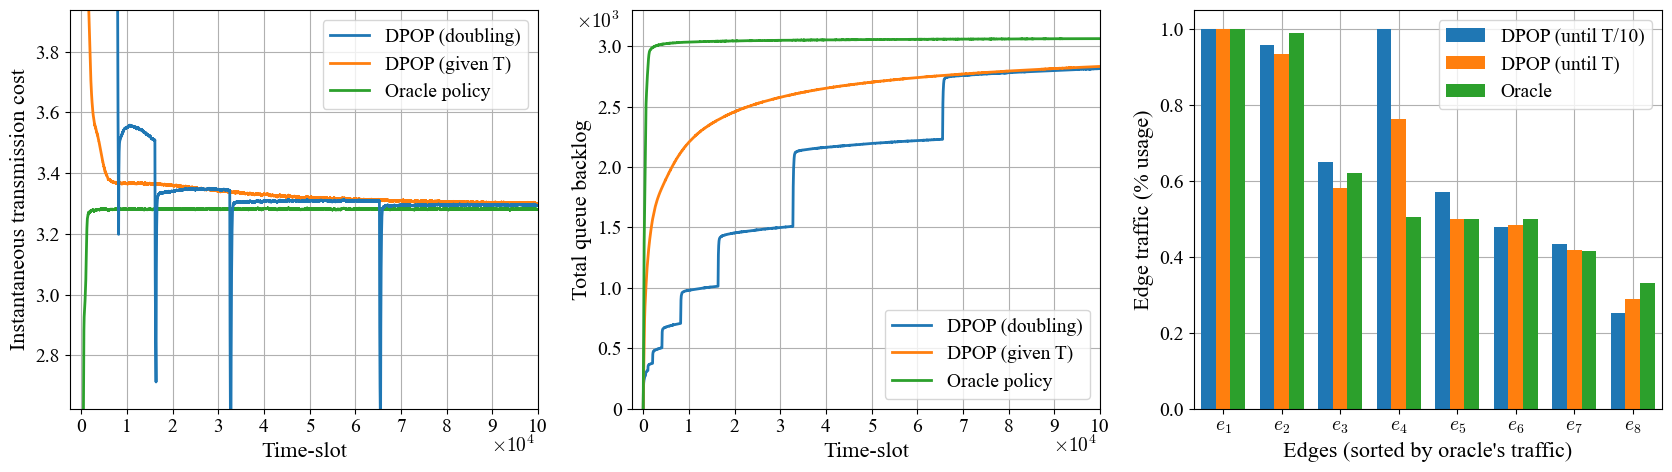

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
pltutils.plot_transmission_cost_curve(axs[0], network_type, unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
pltutils.plot_backlog_curve(axs[1], network_type, unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
pltutils.plot_edge_utilization(axs[2], until_T_list, until_T_labels, dpop_rates, oracle_rates, edge_capacities)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type  + '/run-plots' + save_as, bbox_inches='tight')
plt.show();

### Separate Backlog, Cost, and Usage Plots

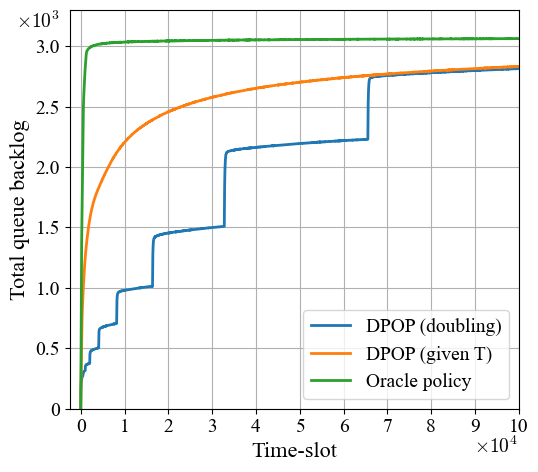

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17/3,5))
pltutils.plot_backlog_curve(ax, network_type, unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type + '/run-plots-backlog' + save_as, bbox_inches='tight')
plt.show();

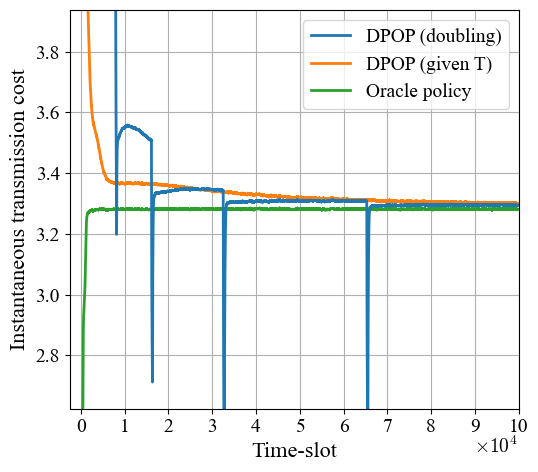

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17/3,5))
pltutils.plot_transmission_cost_curve(ax, network_type, unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type + '/run-plots-cost' + save_as, bbox_inches='tight')
plt.show();

In [57]:
reload(pltutils)
save_figs_to_folder = './results/figs/'

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


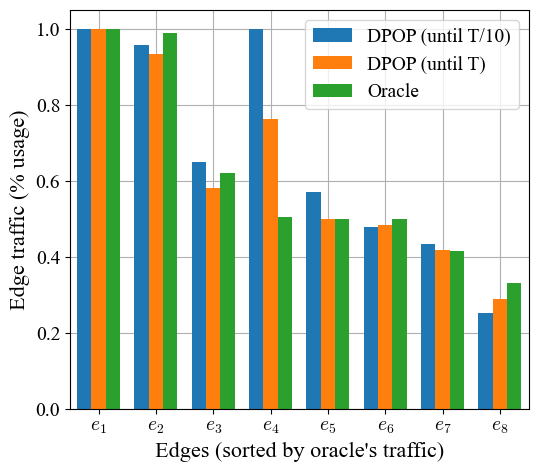

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17/3,5))
pltutils.plot_edge_utilization(ax, until_T_list, until_T_labels, dpop_rates, oracle_rates, edge_capacities)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + network_type + '/run-plots-usage' + save_as, bbox_inches='tight')
plt.show()